In [11]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas_ta as ta
import mplfinance as mpf

In [17]:
url = 'https://min-api.cryptocompare.com/data/histominute' +\
        '?fsym=ETH' +\
        '&tsym=USD' +\
        '&limit=2000' +\
        '&aggregate=1'
response = requests.get(url)
data = response.json()['Data']

df = pd.DataFrame(data)
df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]

In [18]:
df2 = df.rename(columns={"timestamp": "Date", "open": "Open", "high": "High", "low": "Low", "close": "Close", "volumefrom": "Volume"})
df2 = df2[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df2.set_index('Date', inplace=True)

### Supertrend indicator

In [140]:
rang = (1200, 1800)
rsidf = df2.ta.rsi()[rang[0]:rang[1]]
atrdf = df2.ta.atr(length=14)[rang[0]:rang[1]]
superdf = df2.ta.supertrend()[rang[0]:rang[1]]
linreg1df = df2.ta.linreg(length=20)[rang[0]:rang[1]]
linreg2df = df2.ta.linreg(length=50)[rang[0]:rang[1]]
linreg3df = df2.ta.linreg(length=200)[rang[0]:rang[1]]
smafastdf = df2.ta.sma(length=20)[rang[0]:rang[1]]
smaslowdf = df2.ta.sma(length=200)[rang[0]:rang[1]]
emafastdf = df2.ta.ema(length=20)[rang[0]:rang[1]]
emaslowdf = df2.ta.ema(length=200)[rang[0]:rang[1]]
# macddf = df2.ta.macd(fast=10, slow=100)[rang[0]:rang[1]]
# print(macddf)
df3 = df2[rang[0]:rang[1]]

plots = [
#     mpf.make_addplot(superdf[['SUPERT_7_3.0']], panel=0, linestyle='solid', width=2, color=('b')),
    mpf.make_addplot(superdf[['SUPERTl_7_3.0']], panel=0, linestyle='solid', width=2, color=('g')),
    mpf.make_addplot(superdf[['SUPERTs_7_3.0']], panel=0, linestyle='solid', width=2, color=('r')),

#     mpf.make_addplot(macddf[['MACD_10_100_9']], type="bar", panel=4, width=1, color=('blue'), ylabel='MACD'),
    mpf.make_addplot(smafastdf, panel=0, linestyle='solid', width=1, color=('black')),
    mpf.make_addplot(smaslowdf, panel=0, linestyle='solid', width=1, color=('black')),
#     mpf.make_addplot(emafastdf, panel=0, linestyle='solid', width=1, color=('blue')),
#     mpf.make_addplot(emaslowdf, panel=0, linestyle='solid', width=1, color=('blue')),

    mpf.make_addplot(linreg1df, panel=0, linestyle='dotted', width=1, color=('blue')),
    mpf.make_addplot(linreg2df, panel=0, linestyle='dotted', width=1, color=('green')),
    mpf.make_addplot(linreg3df, panel=0, linestyle='dotted', width=1, color=('red')),
    
    mpf.make_addplot(rsidf, panel=2, linestyle='dotted', width=1, ylabel='RSI', color=('r')),
    mpf.make_addplot(atrdf, panel=3, linestyle='dotted', width=1, ylabel='ATR', color=('b'))
]

/usr/local/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


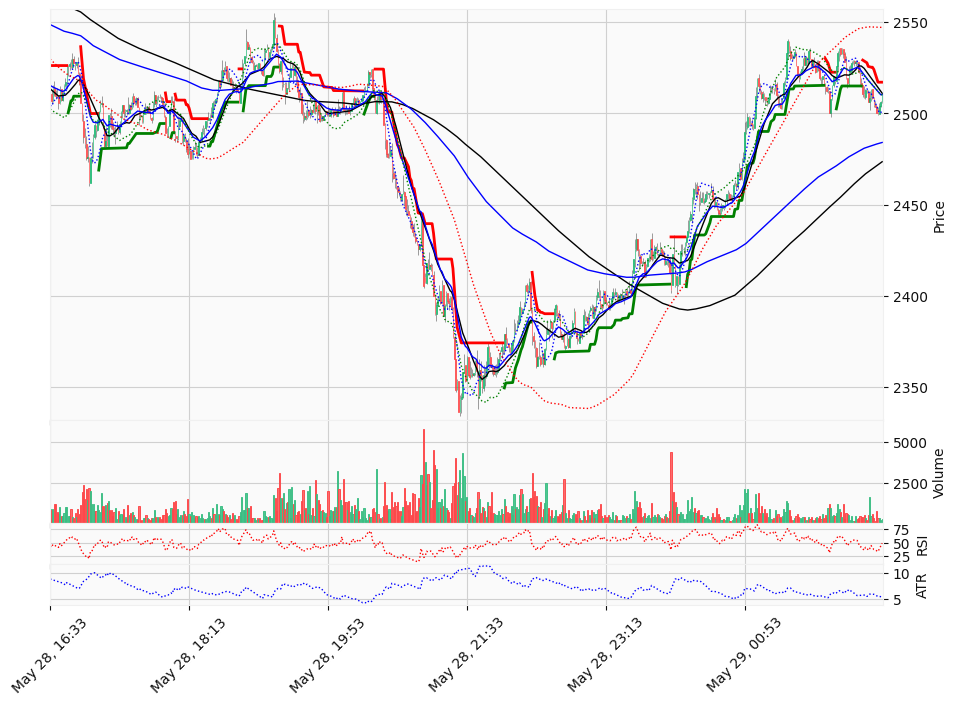

In [141]:
mpf.plot(df3,
         type='candle',
         figscale=1.2,
         volume=True,
         style='yahoo',
         addplot=plots,
         tight_layout=True,
         panel_ratios=(20,5,2,2)
        )